## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [37]:
DataSet=pd.read_csv('arruela_.csv')

In [38]:
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,13:00:06,53,25,69,81,68,1,0
1,13:00:07,53,26,89,87,56,1,0
2,13:00:08,53,27,68,69,55,1,0
3,13:00:09,53,28,36,50,80,1,0
4,13:00:10,53,29,71,72,50,1,0


In [39]:
DataSet.drop(['Hora','Tamanho'],axis=1,inplace=True)

In [41]:
DataSet.head()

,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,25,69,81,68,1,0
1,26,89,87,56,1,0
2,27,68,69,55,1,0
3,28,36,50,80,1,0
4,29,71,72,50,1,0


In [40]:
DataSet.describe()

,Referencia,NumAmostra,Area,Delta,Output1,Output2
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,58.310345,59.777778,63.697318,54.747126,0.375479,0.624521
std,9.199888,17.293075,30.629366,35.548413,0.485177,0.485177
min,25.000000,3.000000,6.000000,17.000000,0.000000,0.000000
25%,54.000000,50.000000,46.000000,38.000000,0.000000,0.000000
50%,64.000000,59.000000,56.000000,44.000000,0.000000,1.000000
75%,64.000000,69.000000,68.000000,54.000000,1.000000,1.000000
max,64.000000,120.000000,201.000000,251.000000,1.000000,1.000000


### Váriaveis do *Dataset*

In [42]:
DataSet.columns

Index(['Referencia', 'NumAmostra', 'Area', 'Delta', 'Output1', 'Output2'], dtype='object')

### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

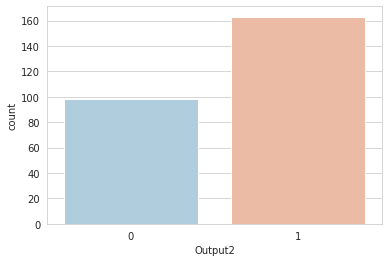

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

#### Gráfico da distribuição das áreas das peças

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


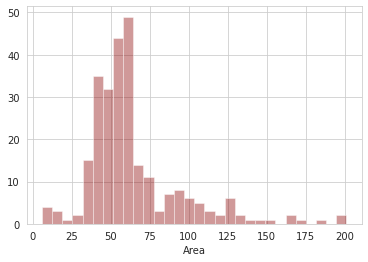

In [44]:
sns.distplot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

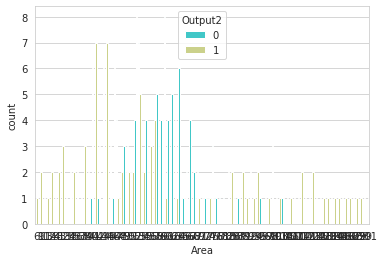

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

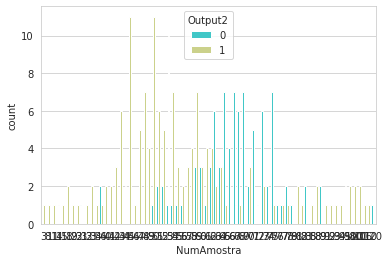

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

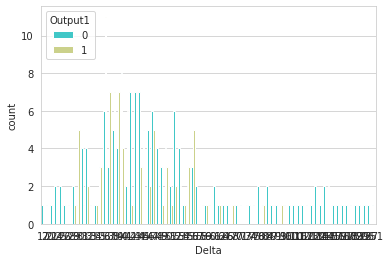

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [ ]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

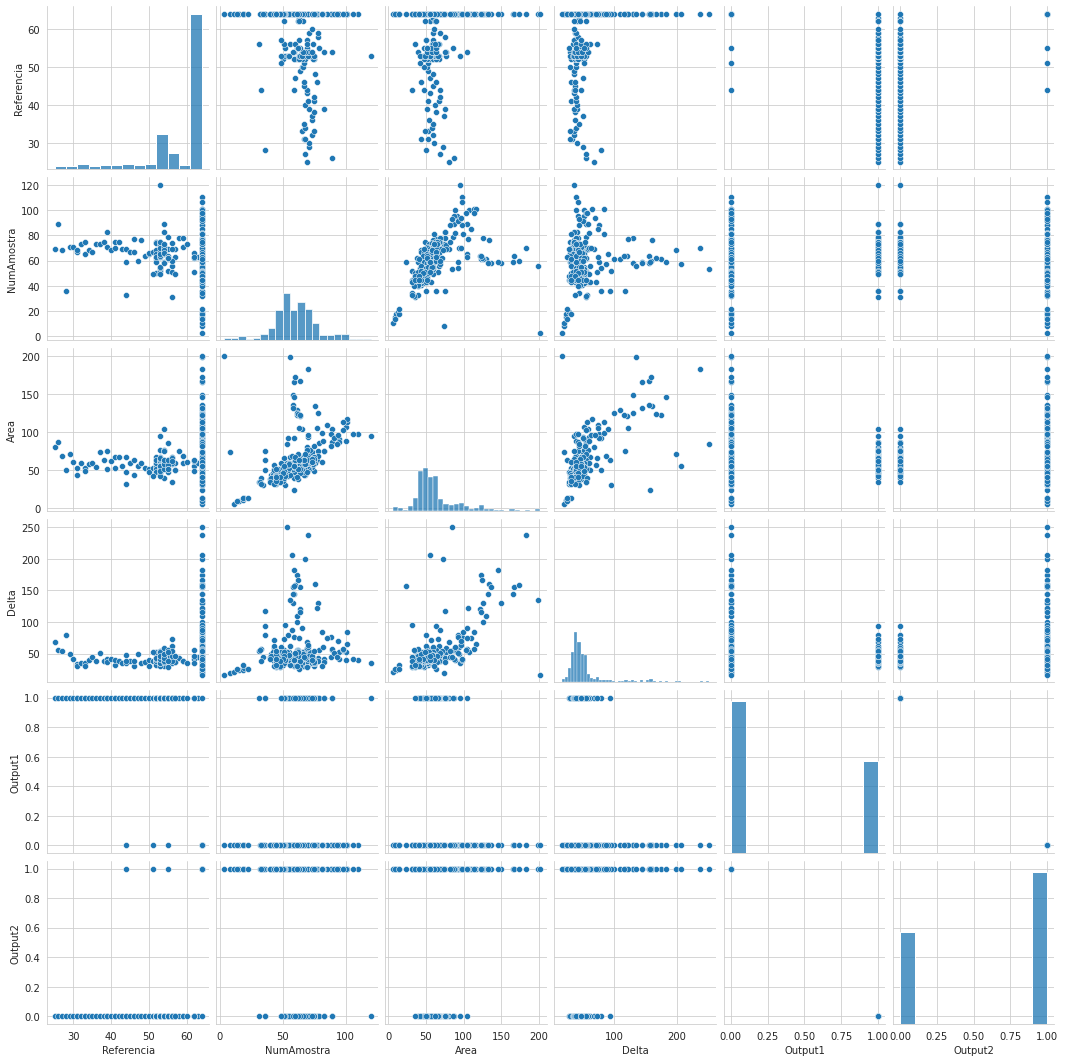

In [48]:
sns.pairplot(DataSet)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

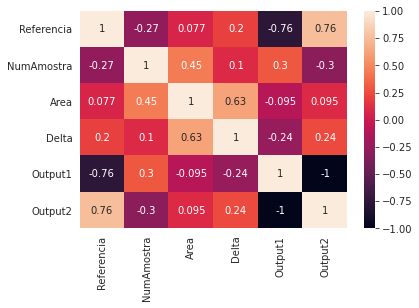

In [67]:
sns.heatmap(DataSet.corr(), annot= True)
plt.show()

## Normalização dos Dados

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DataScaled=scaler.fit_transform(DataSet)
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['NumAmostra', 'Area', 'Delta','Referencia', 'Output1','Output2'])


In [51]:
DataSetScaled.head()

,NumAmostra,Area,Delta,Referencia,Output1,Output2
0,-3.627690,0.534314,0.565990,0.373528,1.289676,-1.289676
1,-3.518784,1.693069,0.762257,0.035312,1.289676,-1.289676
2,-3.409879,0.476377,0.173457,0.007127,1.289676,-1.289676
3,-3.300973,-1.377630,-0.448055,0.711745,1.289676,-1.289676
4,-3.192067,0.650190,0.271590,-0.133796,1.289676,-1.289676


### Conjunto de dados para o treinamento

In [52]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 35% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

print(y_test)
print(X_test)

     Output1  Output2
89         1        0
212        0        1
218        0        1
96         1        0
88         1        0
..       ...      ...
85         1        0
183        0        1
179        0        1
57         1        0
252        0        1

[92 rows x 2 columns]
     NumAmostra      Area     Delta  Referencia
89    -0.469422  0.476377 -0.186366   -0.331089
212    0.619637 -0.856191 -1.036855   -0.725675
218    0.619637  1.229567 -0.088232   -0.669306
96    -0.251610 -1.667319 -0.938722    0.007127
88    -0.469422 -0.103000 -0.415344   -0.472013
..          ...       ...       ...         ...
85    -0.469422  1.345443  0.369724   -0.500197
183    0.619637  0.302564  1.318346    1.021776
179    0.619637 -0.392689 -0.251788   -0.133796
57    -0.251610  0.534314 -0.153655   -0.443828
252    0.619637 -1.493506 -1.069566   -0.302904

[92 rows x 4 columns]


## Criando o Modelo de MPL

In [61]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 4
N_hidden_1 = 8
N_hidden_2 = 4
N_output = 2
learnrate = 0.1

In [62]:
print(n_features)

4


## Inicialização dos pesos da MPL (Aleatório)

In [63]:
#Pesos da Camada Oculta 1 (Inicialização Aleatória)
weights_input_hidden_1 = np.random.normal(0, scale=0.1, size=(N_input, N_hidden_1))
print('Pesos da Camada Oculta 1:')
print(weights_input_hidden_1)

#Pesos da Camada Oculta 2 (Inicialização Aleatória)
weights_input_hidden_2 = np.random.normal(0, scale=0.1, size=(N_hidden_1, N_hidden_2))
print('Pesos da Camada Oculta 2:')
print(weights_input_hidden_2)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden_2, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta 1:
[[ 0.05426418 -0.02881822  0.00259239 -0.12226879 -0.05866515 -0.03885438
   0.01543654  0.07031318]
 [-0.05991273 -0.22770703 -0.00042235 -0.06355453 -0.08112868 -0.12431261
   0.13014504  0.0772443 ]
 [ 0.02125956  0.09688977  0.03478785  0.01632138  0.15613036  0.00167724
  -0.08083226  0.01982072]
 [-0.0452977  -0.13586593  0.01023473 -0.07288988 -0.04780787  0.07127406
  -0.08067032 -0.00900627]]
Pesos da Camada Oculta 2:
[[ 0.17151913  0.05074183  0.0463991  -0.15843745]
 [-0.1328652  -0.09103212 -0.11217599  0.19590772]
 [ 0.13934999 -0.09331724 -0.0205891   0.08523646]
 [-0.02566916 -0.09245492  0.14977982 -0.13339797]
 [-0.07062009  0.0533885  -0.00711663  0.15992768]
 [-0.0824993  -0.05533006  0.1694998   0.08240728]
 [ 0.03387435  0.02912494 -0.01113094  0.01894294]
 [ 0.07218395  0.00557474  0.0968619  -0.07272279]]
Pesos da Camada de Saída:
[[ 0.10539391  0.19451581]
 [ 0.041309    0.02896231]
 [-0.02204735 -0.05757926]
 [ 0.01189058 -0.02486331]]

## Algoritmo Backpropagation

In [64]:
epochs = 20000
last_loss=None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs):
    delta_w_i_h_1 = np.zeros(weights_input_hidden_1.shape)
    delta_w_i_h_2 = np.zeros(weights_input_hidden_2.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input_1 = np.dot(xi, weights_input_hidden_1)
        #Aplicado a função de ativação
        hidden_layer_output_1 = sigmoid(hidden_layer_input_1)

        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input_2 = np.dot(hidden_layer_output_1, weights_input_hidden_2)
        #Aplicado a função de ativação
        hidden_layer_output_2 = sigmoid(hidden_layer_input_2)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output_2, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta 2 para o erro
        hidden_error_2 = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term_2 = hidden_error_2 * hidden_layer_output_2 * (1 - hidden_layer_output_2)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error_1 = np.dot(weights_input_hidden_2,hidden_error_term_2)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term_1 = hidden_error_1 * hidden_layer_output_1 * (1 - hidden_layer_output_1)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term * hidden_layer_output_2[:, None]

        # TODO: Calcule a variação do peso da camada oculta 2
        delta_w_i_h_2 += hidden_error_term_2 * hidden_layer_output_1[:, None]

        # TODO: Calcule a variação do peso da camada oculta 1
        delta_w_i_h_1 += hidden_error_term_1 * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden_1 += learnrate * delta_w_i_h_1 / n_records
    weights_input_hidden_2 += learnrate * delta_w_i_h_2 / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output_1 = sigmoid(np.dot(xi, weights_input_hidden_1))
        hidden_output_2 = sigmoid(np.dot(hidden_output_1, weights_input_hidden_2))
        out = sigmoid(np.dot(hidden_output_2,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  0.2513422914095689
Erro quadrático no treinamento:  0.4079485351050963  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.4077280072139644
Erro quadrático no treinamento:  0.4034578990780228
Erro quadrático no treinamento:  0.3775607562316211
Erro quadrático no treinamento:  0.27970111425004474
Erro quadrático no treinamento:  0.09358011804108071
Erro quadrático no treinamento:  0.02349571189666759
Erro quadrático no treinamento:  0.009848829559489809
Erro quadrático no treinamento:  0.005578580151458944
Erro quadrático no treinamento:  0.003725581286394294
Erro quadrático no treinamento:  0.0027386061044446124
Erro quadrático no treinamento:  0.002137793541916075
Erro quadrático no treinamento:  0.0017368263014688446
Erro quadrático no treinamento:  0.0014508251170649794
Erro quadrático no treinamento:  0.0012363079588738808
Erro quadrático no treinamento:  0.0010689285114335826
Erro quadrático no treinamento:  0.000934090261832516
Err

In [ ]:
### Gráfico da Evolução do Erro

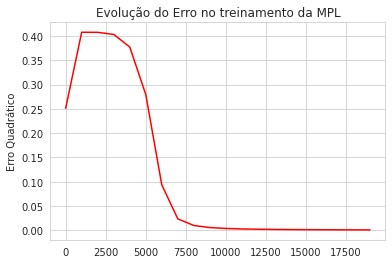

In [65]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

## Validação do modelo

In [66]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
predictions=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input_1 = np.dot(xi, weights_input_hidden_1)

        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input_2 = np.dot(hidden_layer_input_1, weights_input_hidden_2)

        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input_2)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)

#-------------------------------------------    
    
#Cálculo do Erro da Predição
        ## TODO: Cálculo do Erro        
        if (output[0]>output[1]):
            if (yi[0]>yi[1]):
                predictions+=1
                
        if (output[1]>=output[0]):
            if (yi[1]>yi[0]):
                predictions+=1

print("A Acurácia da Predição é de: {:.3f}".format(predictions/n_records))
 


A Acurácia da Predição é de: 0.957
